#Binary Data with the Beta Bernouli Distribution
---

##Let's consider one of the most basic types of data - binary data

In [1]:
import pandas as pd
import seaborn as sns
import math
import cPickle as pickle
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import itertools as it
%matplotlib inline
sns.set_context('talk')

##Binary data can take various forms:

Image data is often represented as binary images.  For example, the MNIST dataset contains images of handwritten digits.  

Let's convert the MNIST digits into binary images

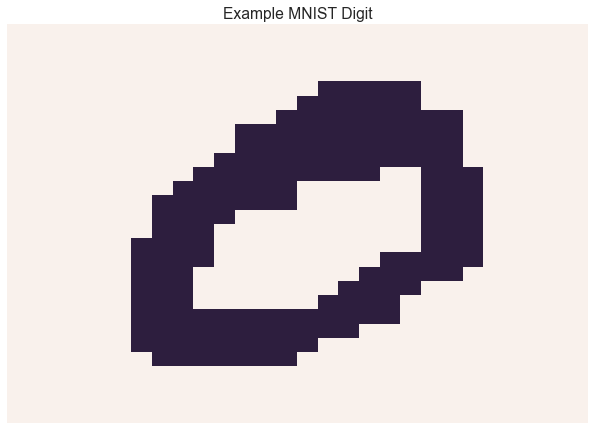

In [2]:
mnist_dataset = fetch_mldata('MNIST original')
_, D = mnist_dataset['data'].shape
Y = mnist_dataset['data'].astype(bool)
W = int(math.sqrt(D))
assert W * W == D
sns.heatmap(np.reshape(Y[0], (W, W)), linewidth=0, xticklabels=False, yticklabels=False, cbar=False)
plt.title('Example MNIST Digit')

###Graphs can be represented as binary matrices  

In this email communication network from the enron dataset, $X_{i,j} = 1$ if and only if person$_{i}$ sent an email to person$_{j}$

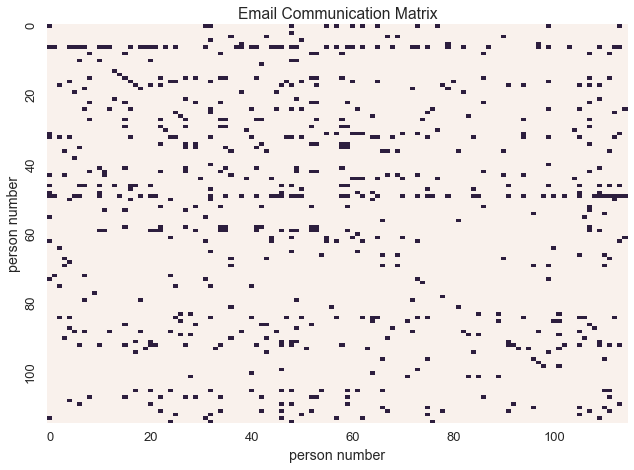

In [3]:
import enron_utils


with open('results.p') as fp:
    communications = pickle.load(fp)
def allnames(o):
    for k, v in o:
        yield [k] + list(v)
names = set(it.chain.from_iterable(allnames(communications)))
names = sorted(list(names))
namemap = { name : idx for idx, name in enumerate(names) }
N = len(names)
communications_relation = np.zeros((N, N), dtype=np.bool)
for sender, receivers in communications:
    sender_id = namemap[sender]
    for receiver in receivers:
        receiver_id = namemap[receiver]
        communications_relation[sender_id, receiver_id] = True
labels = [i if i%20 == 0 else '' for i in xrange(N)]
sns.heatmap(communications_relation, linewidths=0, cbar=False, xticklabels=labels, yticklabels=labels) 
plt.xlabel('person number')
plt.ylabel('person number')
plt.title('Email Communication Matrix')

##In a Bayesian context, one often models binary data with a beta Bernoulli distribution

The beta Bernoulli distribution is the posterior of the Bernoulli distribution and its conjugate prior the beta distribution

Recall that the Bernouli distribution is the likelihood of $x$ given some probability $\theta$

$$P(x=1)=\theta$$
$$P(x=0)=1-\theta$$
$$P(x|\theta)=\theta^x(1-\theta)^{1-x}$$

If we wanted to learn the underlying probability $\theta$, we would use the beta distribution, which is the conjugate prior of the Bernouli distribution.

---

##To import our desired distribution we'd call

In [4]:
from microscopes.models import bb as beta_bernoulli

Then given the specific model we'd want we'd import

`from microscopes.model_name.definition import model_definition`

In [5]:
from microscopes.irm.definition import model_definition as irm_definition
from microscopes.mixture.definition import model_definition as mm_definition

We would then define the model as follows

In [6]:
defn_mixture = mm_definition(Y.shape[0], [beta_bernoulli]*D)
defn_irm = irm_definition([N], [((0, 0), beta_bernoulli)])